# Scikit-oTree Tutorial

In [11]:
%matplotlib inline

from IPython import display as d

import skotree

In [4]:
otree = skotree.oTree("./tests")
otree

<oTree@/home/juan/proyectos/skotree/src/tests>

In [5]:
otree.lsapps()

['matching_pennies']

In [8]:
all_data = otree.all_data()
all_data

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._round_number,participant._current_page_name,participant.ip_address,...,matching_pennies.3.player.is_winner,matching_pennies.3.player.payoff,matching_pennies.3.group.id_in_subsession,matching_pennies.3.subsession.round_number,matching_pennies.4.player.id_in_group,matching_pennies.4.player.penny_side,matching_pennies.4.player.is_winner,matching_pennies.4.player.payoff,matching_pennies.4.group.id_in_subsession,matching_pennies.4.subsession.round_number
0,1,6gho92wf,NaN,0,0,12,NaN,NaN,NaN,NaN,...,NaN,0,1,3,2,NaN,NaN,0,1,4
1,2,nfvftk9p,NaN,0,0,12,NaN,NaN,NaN,NaN,...,NaN,0,1,3,1,NaN,NaN,0,1,4


In [9]:
otree.time_expent()

,session_id,participant__id_in_session,participant__code,page_index,app_name,page_name,time_stamp,seconds_on_page,subsession_pk,auto_submitted


In [18]:
print(otree.app_doc("matching_pennies"))

Matching Pennies: Documentation
*******************************

Accessed: 2017-10-17


A demo of how rounds work in oTree, in the context of 'matching pennies'


Participant
    id_in_session
        type
            positive integer
        doc
    code
        type
            text
        doc
            Randomly generated unique identifier for the participant. If you would like to merge this dataset with those from another subsession in the same session, you should join on this field, which will be the same across subsessions.
    label
        type
            text
        doc
            Label assigned by the experimenter. Can be assigned by passing a GET param called 'participant_label' to the participant's start URL
    _is_bot
        type
            NullBooleanField
        doc
        choices
            True: Yes
            False: No
    _index_in_pages
        type
            positive integer
        doc
    _max_page_index
        type
            positive integer
   

In [19]:
data = otree.app_data("matching_pennies")
data

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._round_number,participant._current_page_name,participant.ip_address,...,player.payoff,group.id_in_subsession,subsession.round_number,session.code,session.label,session.experimenter_name,session.mturk_HITId,session.mturk_HITGroupId,session.comment,session.is_demo
0,1,6gho92wf,NaN,0,0,12,NaN,NaN,NaN,NaN,...,0,1,1,u8lag9eg,NaN,NaN,NaN,NaN,NaN,0
1,2,nfvftk9p,NaN,0,0,12,NaN,NaN,NaN,NaN,...,0,1,1,u8lag9eg,NaN,NaN,NaN,NaN,NaN,0
2,1,6gho92wf,NaN,0,0,12,NaN,NaN,NaN,NaN,...,0,1,2,u8lag9eg,NaN,NaN,NaN,NaN,NaN,0
3,2,nfvftk9p,NaN,0,0,12,NaN,NaN,NaN,NaN,...,0,1,2,u8lag9eg,NaN,NaN,NaN,NaN,NaN,0
4,1,6gho92wf,NaN,0,0,12,NaN,NaN,NaN,NaN,...,0,1,3,u8lag9eg,NaN,NaN,NaN,NaN,NaN,0
5,2,nfvftk9p,NaN,0,0,12,NaN,NaN,NaN,NaN,...,0,1,3,u8lag9eg,NaN,NaN,NaN,NaN,NaN,0
6,1,6gho92wf,NaN,0,0,12,NaN,NaN,NaN,NaN,...,0,1,4,u8lag9eg,NaN,NaN,NaN,NaN,NaN,0
7,2,nfvftk9p,NaN,0,0,12,NaN,NaN,NaN,NaN,...,0,1,4,u8lag9eg,NaN,NaN,NaN,NaN,NaN,0


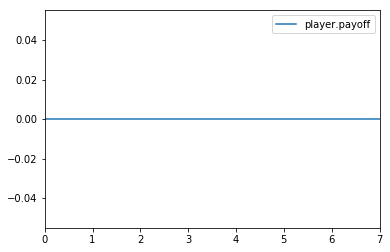

In [30]:
data[["player.payoff"]].plot();